In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importamos el archivo con los datos de las transacciones
## Lo hacemos a traves de pandas 

In [4]:
df = pd.read_csv("../data/processed/card_transdata.csv")


In [20]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# A continucion se muestran algunas graficas que relacionan las variables de las cuales tenemos información con la fraudulencia de la transaccion

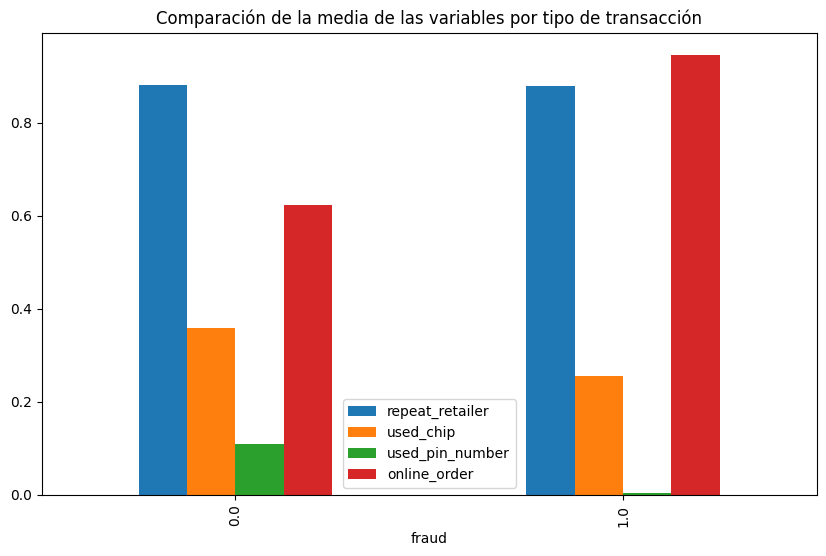

In [16]:
# Grafica que muestra la media de las distancias y del ratio  cuando la transaccion es fraudulenta comparada con la media de las variables cuando la transaccion no es fraudulenta
df.groupby('fraud')[['repeat_retailer','used_chip', 'used_pin_number','online_order']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Comparación de la media de las variables por tipo de transacción')
plt.show()

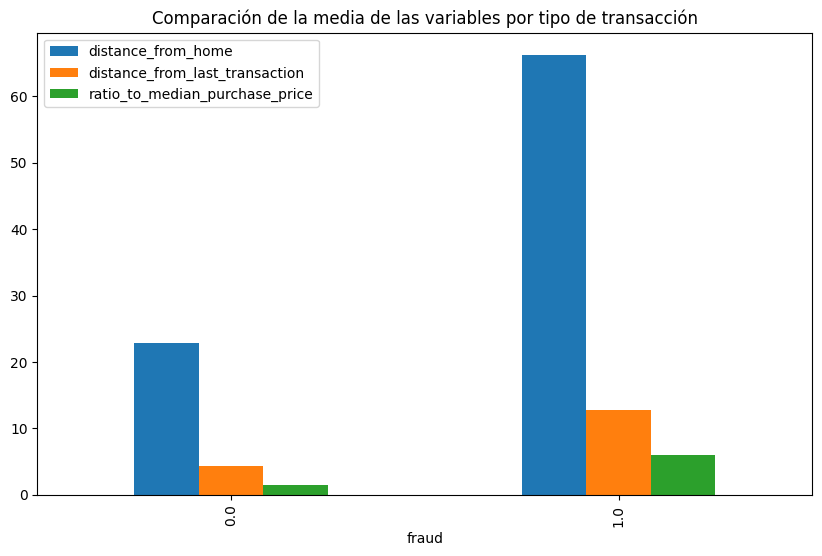

In [17]:
df.groupby('fraud')[['distance_from_home','distance_from_last_transaction', 'ratio_to_median_purchase_price']].mean().plot(kind='bar', figsize=(10,6))
plt.title('Comparación de la media de las variables por tipo de transacción')
plt.show()

In [22]:
corr_matrix = df[['distance_from_home', 'fraud']].corr()
print(corr_matrix)
corr_matrix = df[['distance_from_last_transaction', 'fraud']].corr()
print(corr_matrix)
corr_matrix = df[['ratio_to_median_purchase_price', 'fraud']].corr()
print(corr_matrix)

                    distance_from_home     fraud
distance_from_home            1.000000  0.187571
fraud                         0.187571  1.000000
                                distance_from_last_transaction     fraud
distance_from_last_transaction                        1.000000  0.091917
fraud                                                 0.091917  1.000000
                                ratio_to_median_purchase_price     fraud
ratio_to_median_purchase_price                        1.000000  0.462305
fraud                                                 0.462305  1.000000


In [23]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['fraud'], df['online_order'])

# Realizar el test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic: {chi2}")
print(f"p-value: {p}")


Chi-squared test statistic: 36852.02374794533
p-value: 0.0


In [24]:

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['fraud'], df['repeat_retailer'])

# Realizar el test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic: {chi2}")
print(f"p-value: {p}")

Chi-squared test statistic: 1.827827480587841
p-value: 0.17638436830458504


In [25]:

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['fraud'], df['used_chip'])

# Realizar el test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic: {chi2}")
print(f"p-value: {p}")

Chi-squared test statistic: 3717.4490433572664
p-value: 0.0


In [26]:

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['fraud'], df['used_pin_number'])

# Realizar el test chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared test statistic: {chi2}")
print(f"p-value: {p}")

Chi-squared test statistic: 10057.412546099067
p-value: 0.0
